# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [115]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
print(penguins_df.info())
penguins_df.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None


<bound method NDFrame.head of      culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0                39.1             18.7              181.0       3750.0    MALE
1                39.5             17.4              186.0       3800.0  FEMALE
2                40.3             18.0              195.0       3250.0  FEMALE
3                 NaN              NaN                NaN          NaN     NaN
4                36.7             19.3              193.0       3450.0  FEMALE
..                ...              ...                ...          ...     ...
339               NaN              NaN                NaN          NaN     NaN
340              46.8             14.3              215.0       4850.0  FEMALE
341              50.4             15.7              222.0       5750.0    MALE
342              45.2             14.8              212.0       5200.0  FEMALE
343              49.9             16.1              213.0       5400.0    MALE

[344 rows x 5 columns

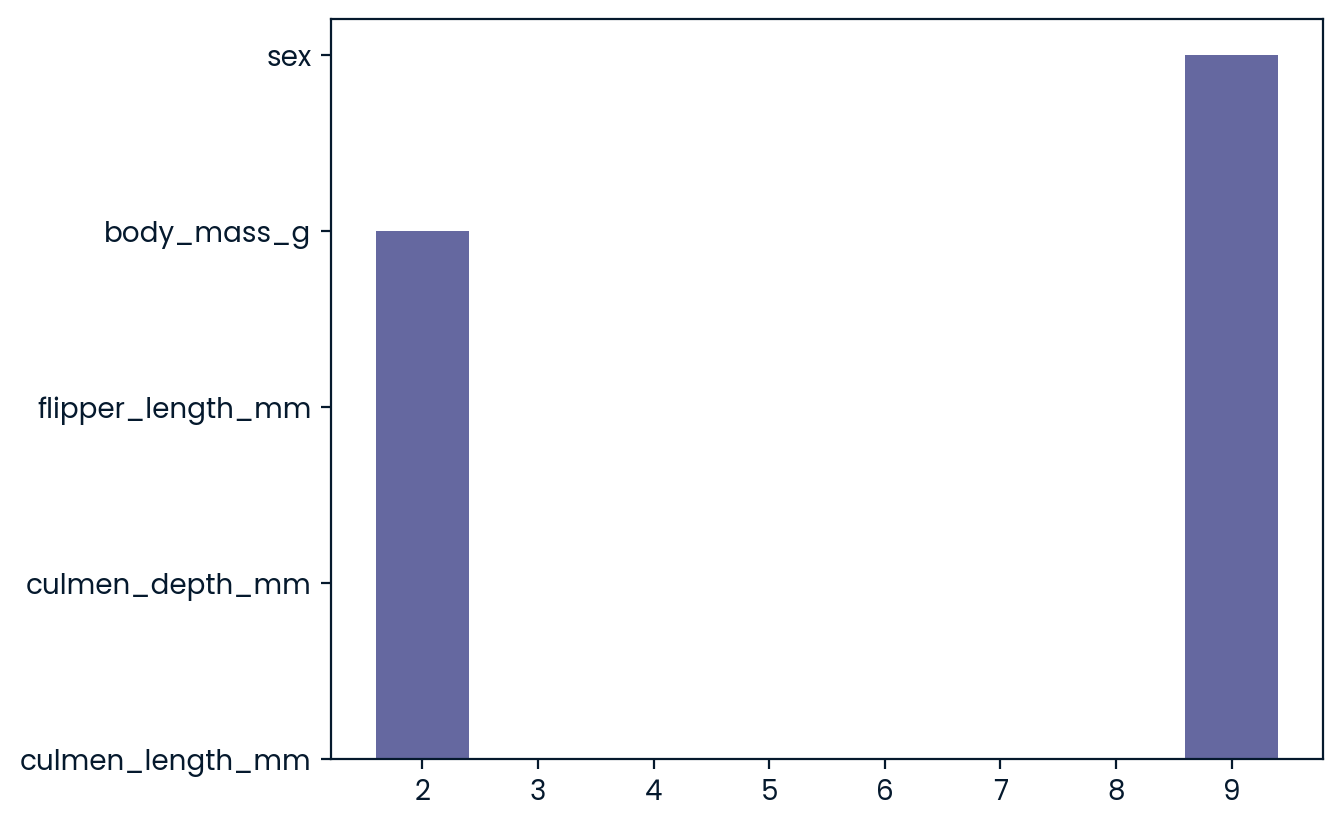

<AxesSubplot: >

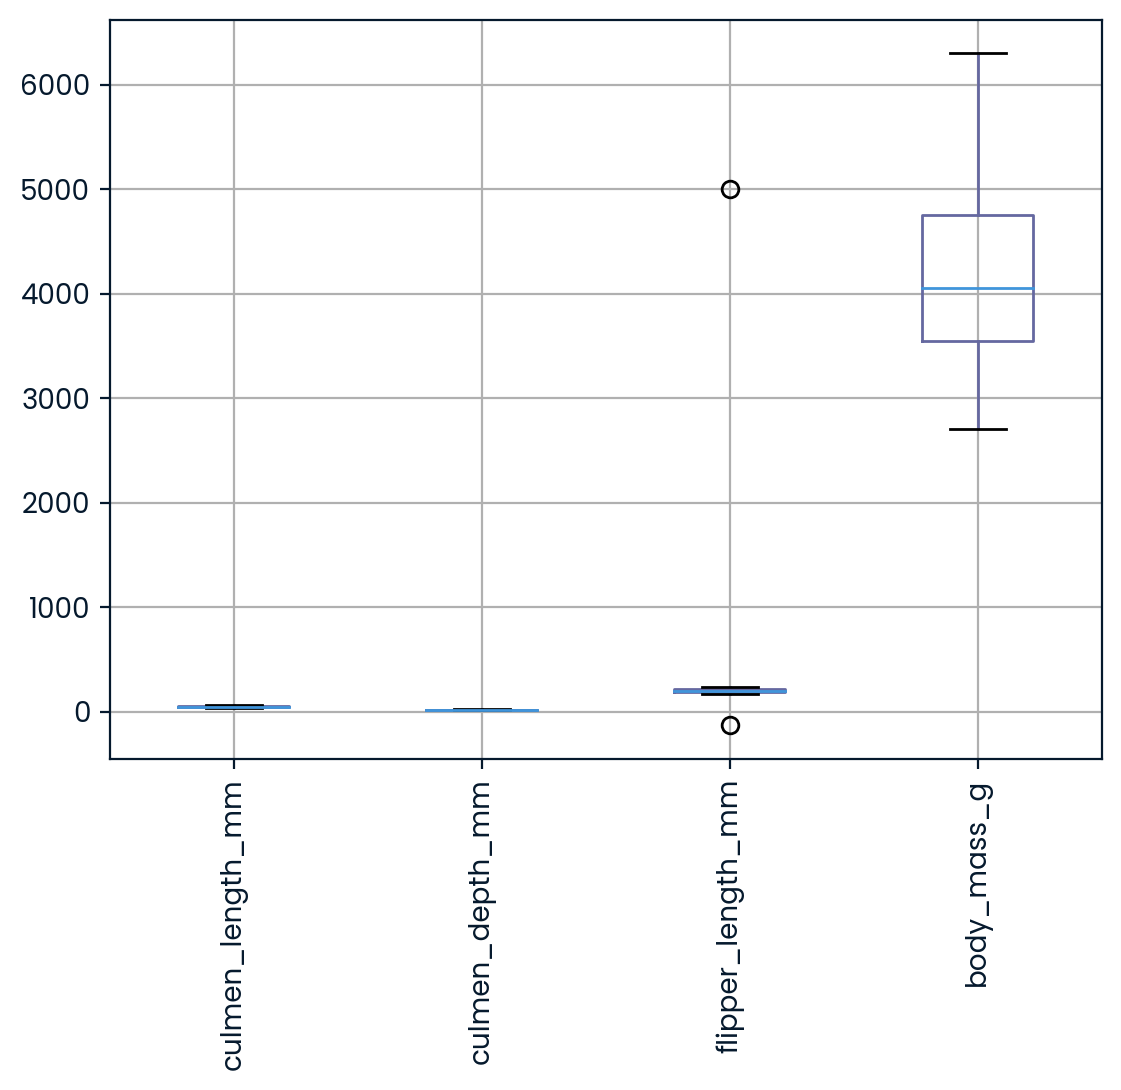

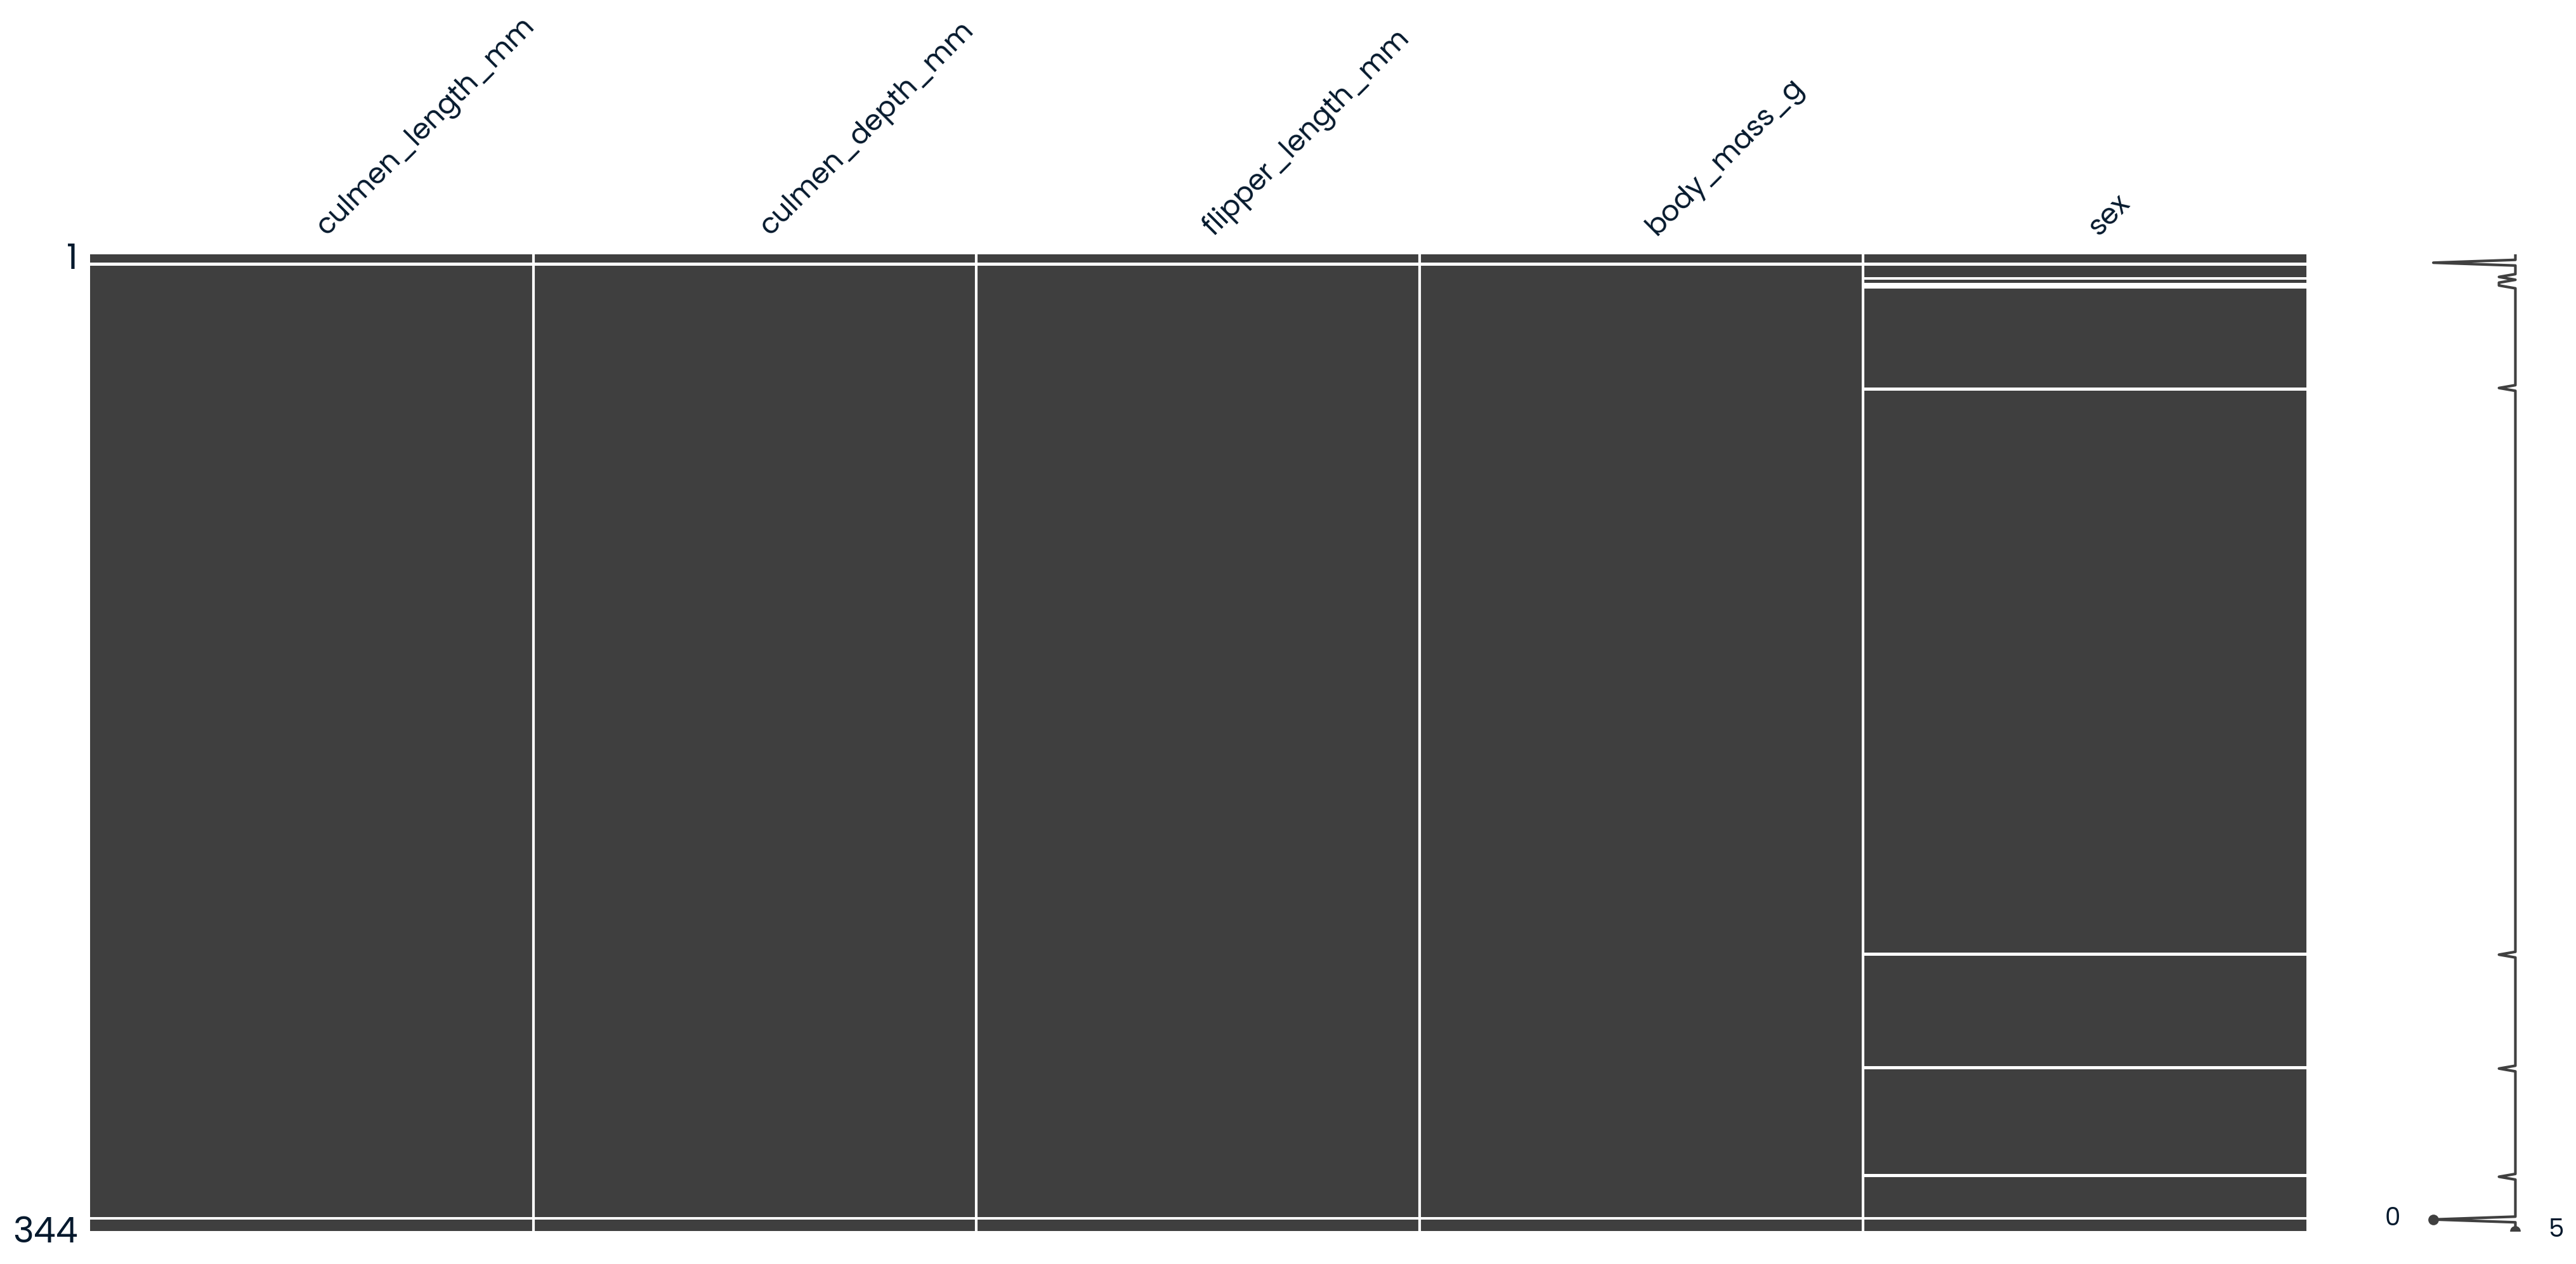

In [116]:
# Looking for null values
plt.bar(penguins_df.isna().sum(), penguins_df.columns)
plt.show()
penguins_df.boxplot() # To determine the outliers
plt.xticks(rotation = 90)
import missingno as msno
msno.matrix(penguins_df)


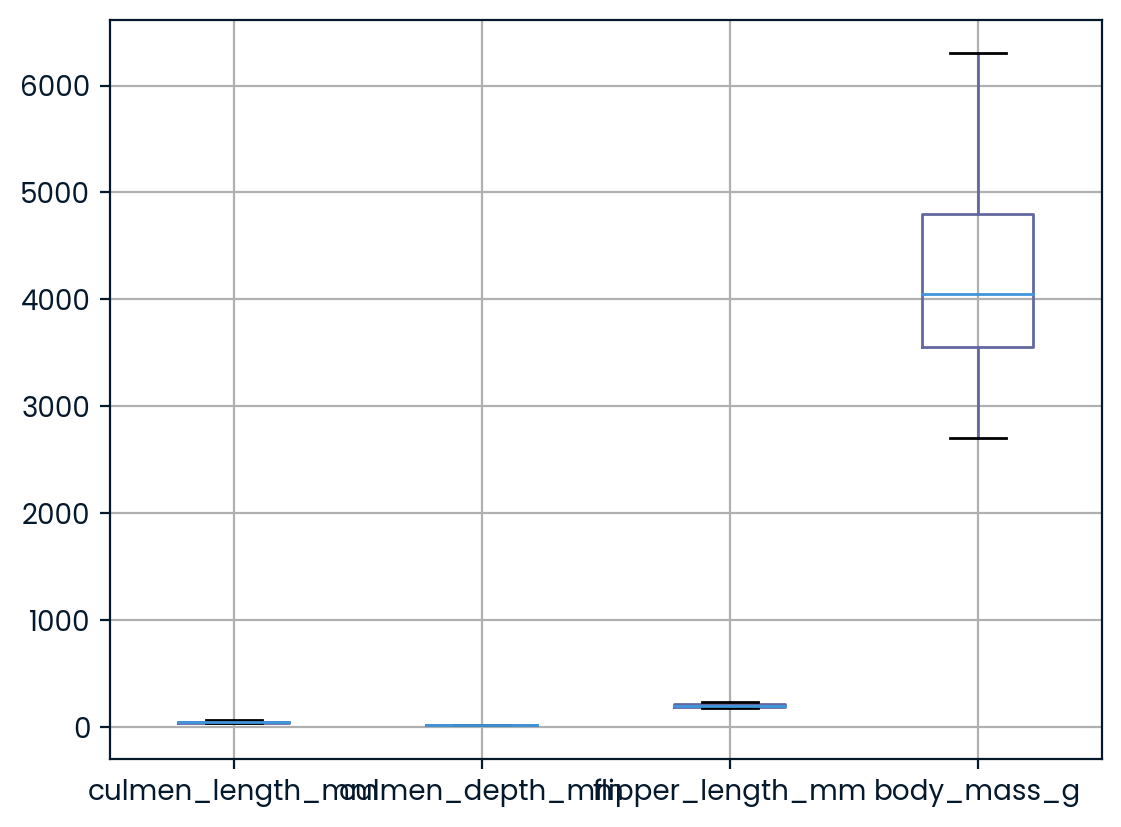

In [117]:
# Removing null values (because < 5% of the dataset)
penguins_clean = penguins_df.dropna()
penguins_clean.isna().sum() # Checking that the drop happened

# Removing outliers
penguins_clean = penguins_clean[(penguins_clean["flipper_length_mm"] > 0) & (penguins_clean["flipper_length_mm"] < 4000)]

penguins_clean.boxplot() # Checking for removal efficiency
plt.show()

In [118]:
# Creating dummies based off the cleaned dataset
dummies = pd.get_dummies(penguins_clean)
dummies_final = dummies.drop('sex_.', axis = 1) # Dropping the redundance

dummies_final

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0
340,46.8,14.3,215.0,4850.0,1,0
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,0


In [119]:
# Scaling
scaler = StandardScaler()

# Fit transform with the dummies
penguins_preprocessed = scaler.fit_transform(dummies_final)

penguins_preprocessed

array([[-0.90552018,  0.79312591, -1.42812496, -0.56970896, -0.99103121,
         0.99700149],
       [-0.83193838,  0.12850298, -1.07152207, -0.50757924,  1.00904996,
        -1.00300753],
       [-0.68477478,  0.43525202, -0.42963687, -1.1910061 ,  1.00904996,
        -1.00300753],
       ...,
       [ 1.17316569, -0.74061931,  1.49601872,  1.91547962, -0.99103121,
         0.99700149],
       [ 0.21660228, -1.20074288,  0.78281295,  1.23205276,  1.00904996,
        -1.00300753],
       [ 1.08118844, -0.53611995,  0.85413352,  1.48057162, -0.99103121,
         0.99700149]])

In [120]:
# Finding the best number of components based off of the variance ratio > 10%
model = PCA()
model.fit(penguins_preprocessed)
print(model.explained_variance_ratio_)
n_components = 2

model = PCA(n_components = n_components)
# model.fit(penguins_preprocessed).explained_variance_ratio_   to check
penguins_PCA = model.fit_transform(penguins_preprocessed)

[0.51973484 0.34424041 0.08591863 0.03225427 0.01686049 0.00099136]


[1726.2225566284403, 899.7404440438718, 436.55136086903633, 128.39199312313303, 93.95345390530491, 64.56914056291352, 55.09567384709446, 45.64834710934329, 41.0470542551772]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


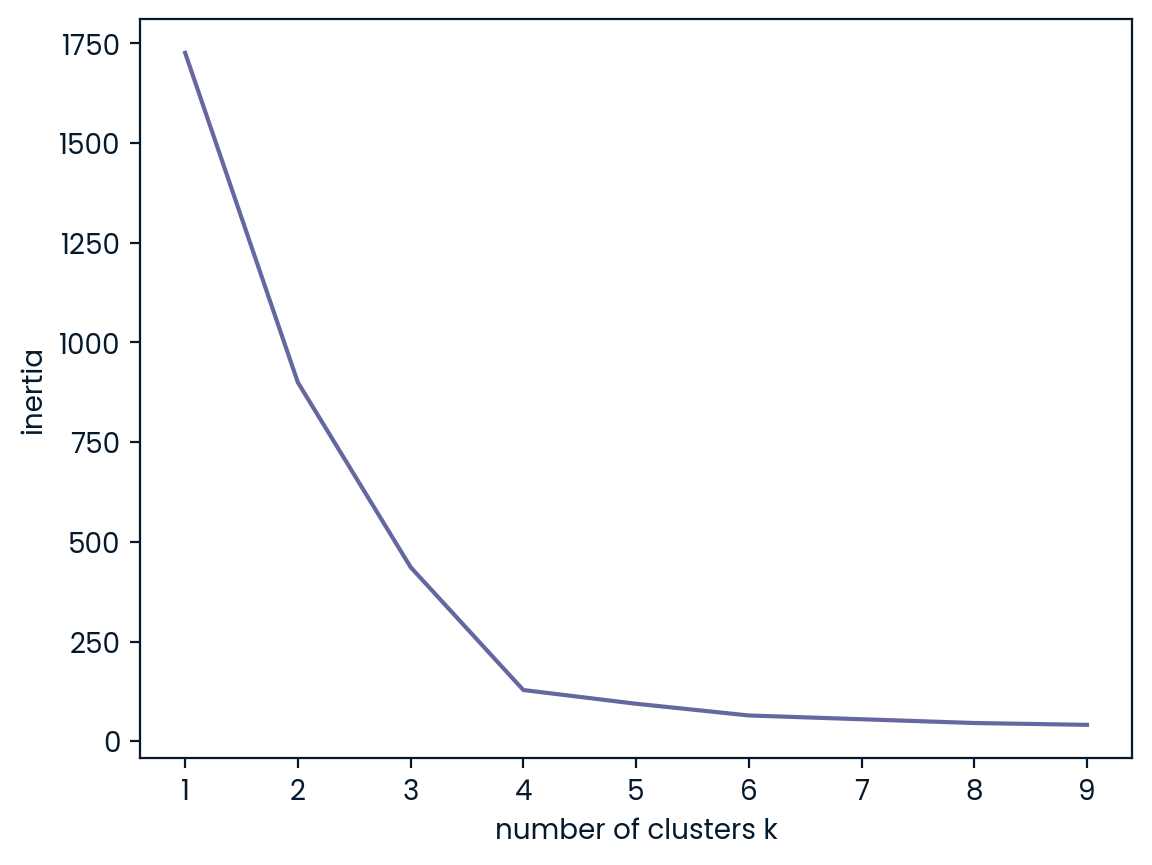

In [121]:
# Plotting the elbow for the kmeans, to find the optimal k
inertia = []
k_number = []

for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(penguins_PCA)
    inertias = kmeans.inertia_
    inertia.append(inertias)
    k_number.append(k)

print(inertia)
print(k_number)
plt.plot(k_number, inertia)
plt.xlabel("number of clusters k")
plt.ylabel("inertia")
plt.show()

n_clusters = 4



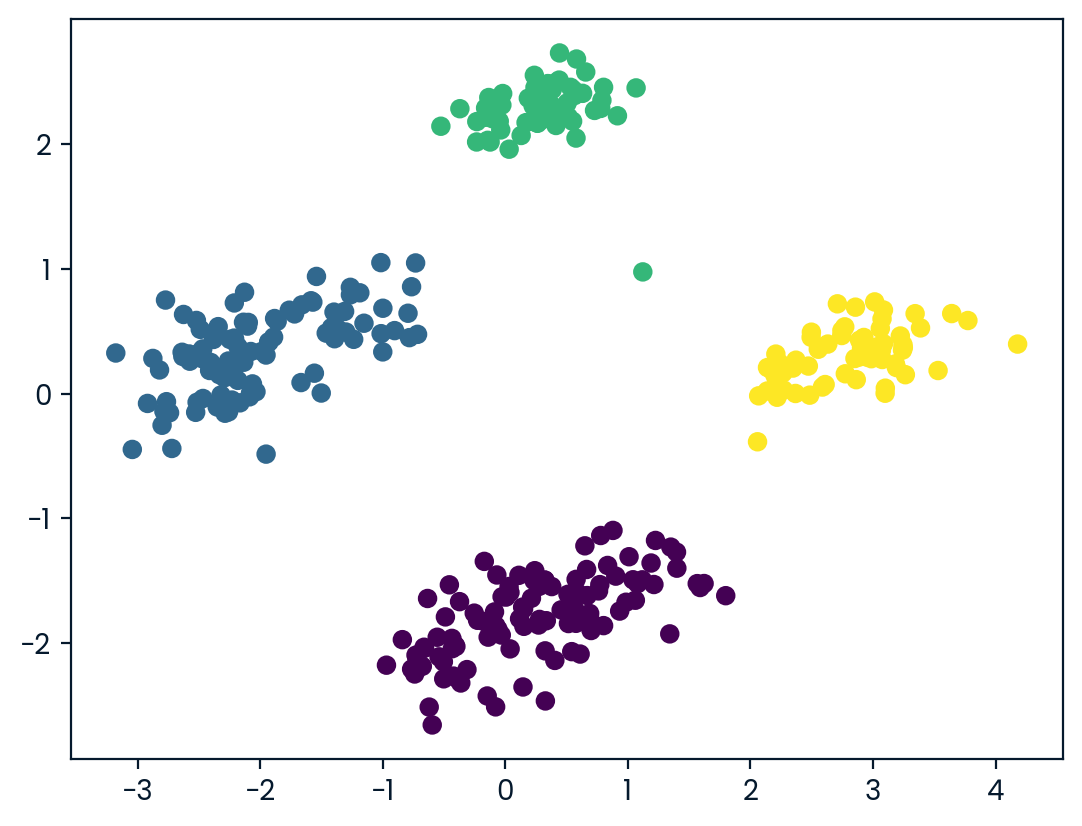

In [122]:
# Doing the Kmean with the determined number of clusters
kmeans = KMeans(n_clusters = n_clusters, random_state = 42).fit(penguins_PCA)

#Plotting with the two first components of the PCA and the labels of the kmeans
plt.scatter(penguins_PCA[:,0], penguins_PCA[:,1], c = kmeans.labels_)
plt.show()

In [123]:
penguins_clean['label'] = kmeans.labels_

penguins_clean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,1
2,40.3,18.0,195.0,3250.0,FEMALE,1
4,36.7,19.3,193.0,3450.0,FEMALE,1
5,39.3,20.6,190.0,3650.0,MALE,0
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE,2
340,46.8,14.3,215.0,4850.0,FEMALE,2
341,50.4,15.7,222.0,5750.0,MALE,3
342,45.2,14.8,212.0,5200.0,FEMALE,2


In [124]:
#Creating a list of the numeric columns
numeric_columns = penguins_clean.drop('sex', axis =1).columns

stat_penguins = penguins_clean.groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066
